# Introduction

## Overview
In this notebook, I will delve into the HR dataset once again to explore the relationship between two key variables: **Total working years** and **salary**. Using a linear regression model, I aim to determine if there is a correlation between these variables and if the model can predict an employee's monthly income based on their total working years.

## Linear Regression Analysis
Linear regression is a statistical method used to model the relationship between a dependent variable (in this case, monthly income) and one or more independent variables (total working years). By fitting a linear equation to the data, we can understand the nature and strength of the relationship.

## Exploratory Data Analysis
To begin the analysis, I will first visualize the data through a scatter plot. This plot will help us gain insights into the potential correlation between total working years and monthly income. A visual examination of the data can often provide initial indications of trends.

# Data Preparation

## Importing Libraries
I'll start by importing the necessary libraries, including the scikit-learn library for linear regression and other tools for data manipulation and visualization.

## Loading the Dataset
I'll load the HR dataset, which contains information about employees. I was specifically interested in the 'MonthlyIncome' and 'TotalWorkingYears' columns for this analysis.

# Exploratory Data Analysis 

## Visualizing the Relationship
To better understand the relationship between 'TotalWorkingYears' and 'MonthlyIncome', I created a scatter plot. This plot will help identify any potential patterns or trends in the data.

# Data Splitting

## Creating Training and Testing Sets
Before building the model, I needed to split the data into training and testing sets. The training set will be used to train the linear regression model, while the testing set will be used to evaluate its performance.

# Model Building

## Linear Regression Model
Here I built a linear regression model using the training data. This model aims to predict an employees 'MonthlyIncome' based on their 'TotalWorkingYears'.

# Model Evaluation

## Assessing Performance
Using the testing set, I'll evaluate the performance of the linear regression model. One key metric that will be used is the Mean Squared Error, which quantifies how well the model's predictions match the actual values.

# Visualizing Predictions

## Scatter Plot with Predictions
To provide a visual representation of the model's performance, I have created a scatter plot. This plot will display both the true monthly incomes as blue dots and the predicted incomes by the model as a red line.

# Conclusion

## Insights and Reflection
Through the linear regression analysis, I've gained insights into the correlation between total working years and monthly income. The model's predictions provide valuable information about how accurately it can estimate an employee's income based on their work experience.

## Future Considerations
This analysis opens the door to further exploration and potential improvements. Future steps might involve refining the model, considering additional variables, or applying different regression techniques to enhance predictive accuracy.

By completing this analysis, I aim to contribute to a better understanding of employee compensation and the factors that influence it within the business.

---


## Analysis of the Data:
---

## Import the packages to be used:

In [52]:
#Data Frames
import pandas as pd

#Main Statical package
import scipy.stats as stats

#Used for plotting
import matplotlib.pyplot as plt

#Enhanced version for plotting
import seaborn as sns

#Numberical arrays
import numpy as np

#Formating into pretty tables
from tabulate import tabulate

#To create the Linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [53]:
#Load the HR data from an Excel file into a DataFrame
file_path = r'C:\Users\35385\Desktop\Machine Learning & Stats\HR_Data_2022.xlsx'
data = pd.read_excel(file_path)

#Print the column names
print("Column Names:", data.columns)

Column Names: Index(['Age', 'Department', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MonthlyIncome', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [54]:
#Creating my New Dataframe to work with just these two columns
selected_Columns = ['MonthlyIncome', 'TotalWorkingYears']
new_DF = data[selected_Columns]

# Display the new DataFrame
print(new_DF)


    MonthlyIncome  TotalWorkingYears
0            5993                  8
1            5130                 10
2            2090                  7
3            2909                  8
4            3468                  6
..            ...                ...
95          13549                 16
96           4999                  4
97           4221                  5
98          13872                 38
99           2042                 17

[100 rows x 2 columns]


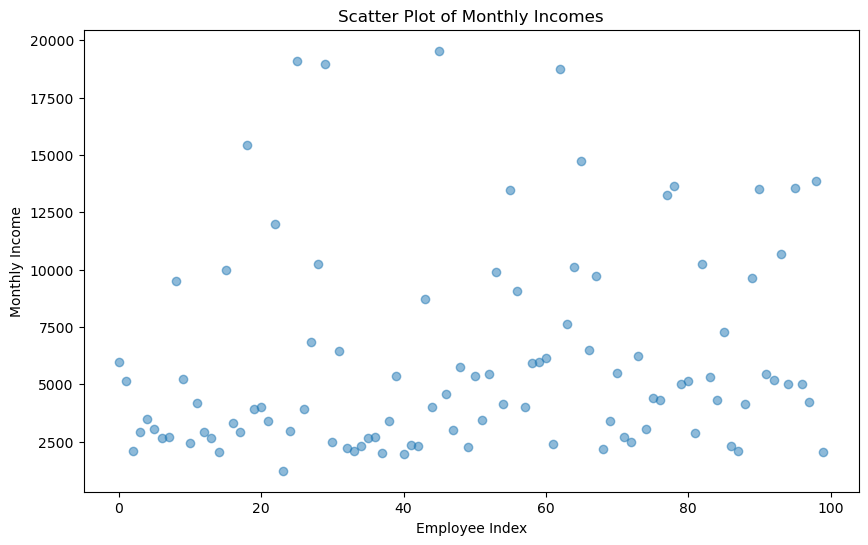

In [55]:
#Creating a plot to visualise my Income Data
monthly_Incomes = new_DF['MonthlyIncome']

#Create the scatter plot with all the attributes
plt.figure(figsize=(10, 6))
plt.scatter(range(len(monthly_Incomes)), monthly_Incomes, alpha=0.5)
plt.xlabel('Employee Index')
plt.ylabel('Monthly Income')
plt.title('Scatter Plot of Monthly Incomes')
plt.show()


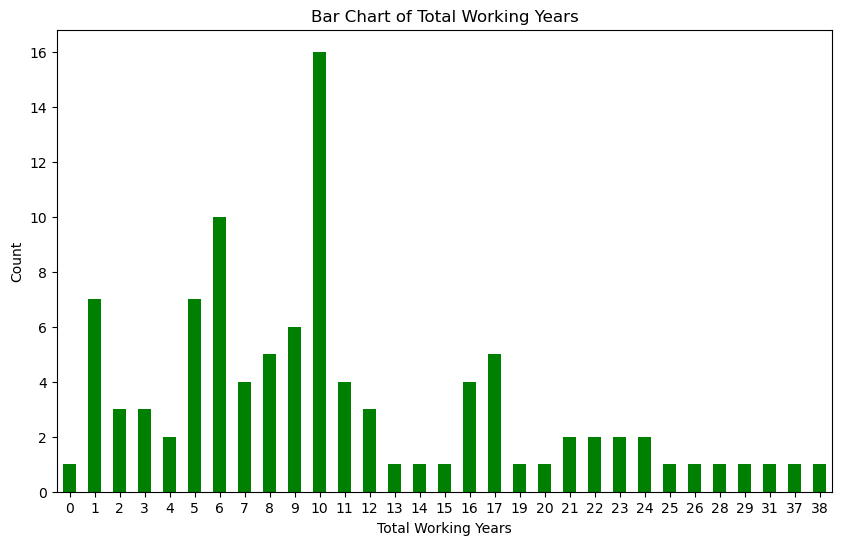

In [56]:
#Creating a visualisation of the total working years data
total_Working_Years = new_DF['TotalWorkingYears']

# Count the occurrences of each total working years value
working_Years_Counts = total_Working_Years.value_counts().sort_index()

# Create the bar chart
plt.figure(figsize=(10, 6))
working_Years_Counts.plot(kind='bar', color="green")
plt.xlabel('Total Working Years')
plt.ylabel('Count')
plt.title('Bar Chart of Total Working Years')
plt.xticks(rotation=0)
plt.show()


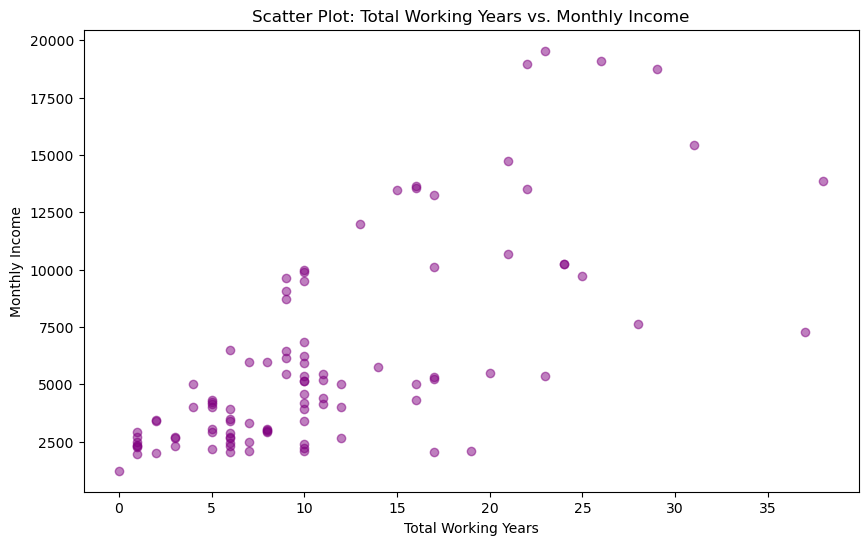

In [57]:
#Exploratory Data Analysis to understand the relationship between my two variables Total Working Years and Monthly Income. 
total_Working_Years = new_DF['TotalWorkingYears']
monthly_Income = new_DF['MonthlyIncome']

#Showing the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(total_Working_Years, monthly_Income, alpha=0.5, color="purple")
plt.xlabel('Total Working Years')
plt.ylabel('Monthly Income')
plt.title('Scatter Plot: Total Working Years vs. Monthly Income')
plt.show()


## Creating my Training and Test Sets
---

Data splitting is an important step in building predictive models. It involves dividing the dataset into a training set and a testing set. The training set is used to train the model, while the testing set is used to evaluate its performance on unseen data. To achieve this I used the scikit-learn library and can be seen below: 

In [58]:
#Creating my training and testing sets
#X is my independent variable and y is my dependent variable. 
X = new_DF[['TotalWorkingYears']]  
y = new_DF['MonthlyIncome']        

#size is 20% of the data is sent to testing and spliting into training and test sets. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Printing the shapes of the resulting datasets.
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (80, 1)
X_test shape: (20, 1)
y_train shape: (80,)
y_test shape: (20,)


## Linear Regression Model
---

Now that I have the data split into training and testing sets: 

- X_train contains 80 samples and 1 feature (total working years).
- X_test contains 20 samples and 1 feature (total working years).
- y_train contains 80 samples (corresponding monthly incomes).
- y_test contains 20 samples (corresponding monthly incomes).


The next steps involve building and training a linear regression model using the training data, and then evaluating its performance on the testing data. 

In [59]:
#Creating the linear regression model
model = LinearRegression()

#Training the model on the training data
model.fit(X_train, y_train)

#Using the trained model to make predictions on the testing data
y_pred = model.predict(X_test)

#Calculating the Mean Squared Error to evaluate the models performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 13619975.70503221


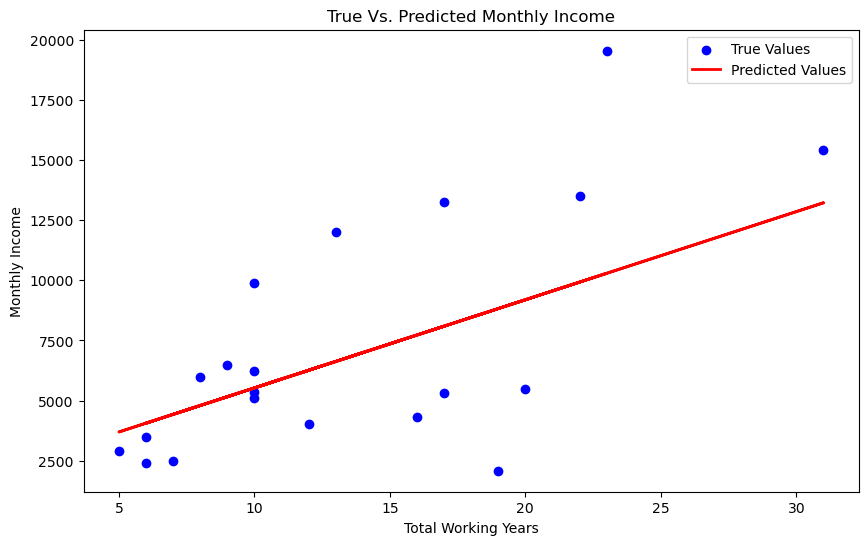

In [60]:
#Showing the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='True Values')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Values')
plt.xlabel('Total Working Years')
plt.ylabel('Monthly Income')
plt.title('True Vs. Predicted Monthly Income')
plt.legend()
plt.show()

The scatter plot shows the true monthly incomes in blue dots and the predicted monthly incomes by the model is shown by the red line. This gives a visual sense of how well the model predictions look against the actual values. Additionally, the Mean Squared Error will provide a quantitative measure of the model's performance. The lower the Mean Squared Error the better predictive performance. 

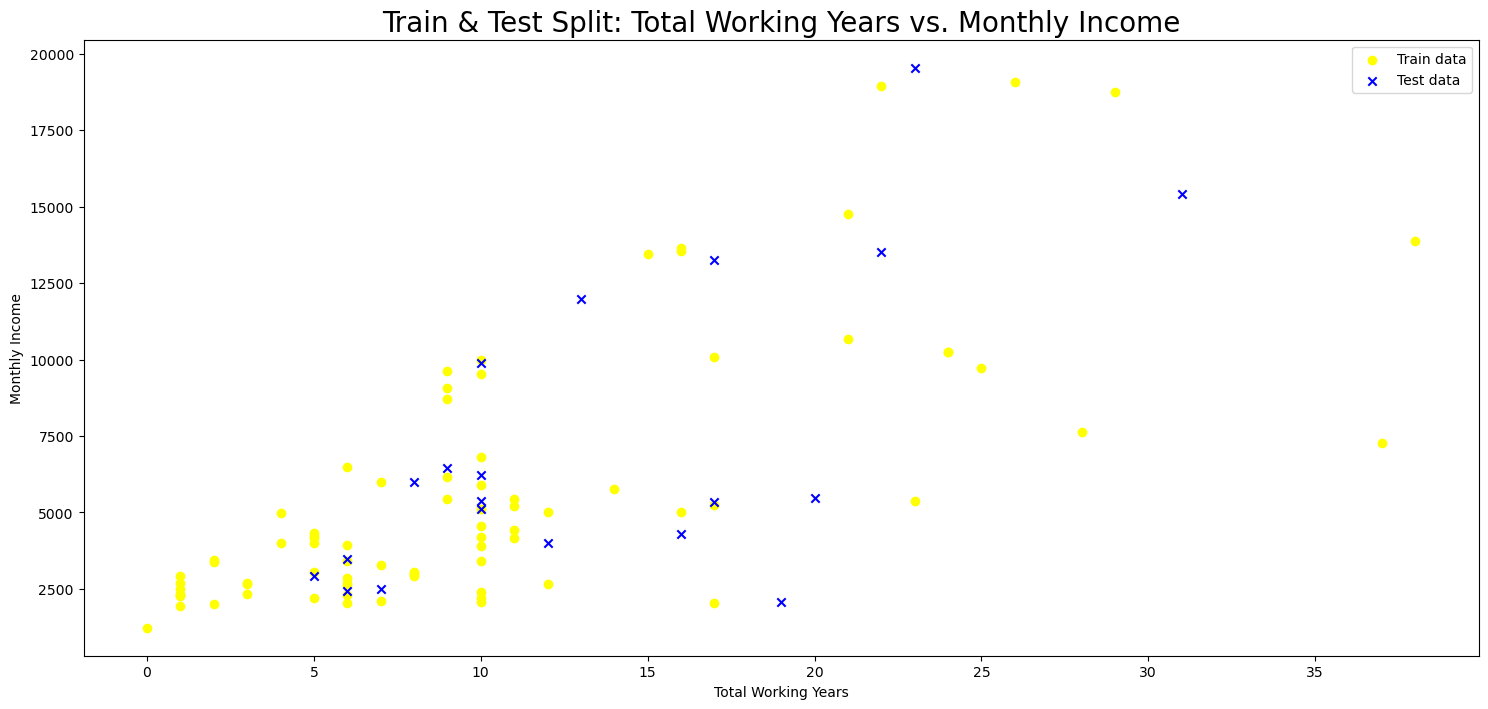

In [61]:
#Creating the figure & axis
fig, ax = plt.subplots(figsize=(18, 8))

#A Scatter plots for training data
ax.scatter(X_train, y_train, marker='o', color='yellow', label='Train data')

#A Scatter plot for testing data
ax.scatter(X_test, y_test, marker='x', color='blue', label='Test data')

#Setting the Plot title
ax.set_title('Train & Test Split: Total Working Years vs. Monthly Income', fontsize=20)

#Setting X-axis label
ax.set_xlabel('Total Working Years')

#Setting the Y-axis label
ax.set_ylabel('Monthly Income')

#Show the legend
ax.legend()

#Asking the plot to be shown.
plt.show()
